In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split

In [2]:
digits = datasets.load_digits()
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

In [17]:
n_samples = len(digits.images)
X = digits.images.reshape((n_samples, -1))
y = digits.target

# Split the dataset in two equal parts
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=3)

In [4]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()

In [6]:
# Create the GridSearch estimator along with a parameter object containing the values to adjust
from sklearn.model_selection import GridSearchCV
param_grid = {'n_estimators': [10, 100, 1000], 
                'max_depth': [2, 5, 10, 20]}
grid = GridSearchCV(model, param_grid, verbose=3)


In [18]:
# Fit the model using the grid search estimator. 
# This will take the Random Forest model and try each combination of parameters
grid.fit(X_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] max_depth=2, n_estimators=10 ....................................
[CV] ........ max_depth=2, n_estimators=10, score=0.752, total=   0.0s
[CV] max_depth=2, n_estimators=10 ....................................
[CV] ........ max_depth=2, n_estimators=10, score=0.756, total=   0.0s
[CV] max_depth=2, n_estimators=10 ....................................
[CV] ........ max_depth=2, n_estimators=10, score=0.740, total=   0.0s
[CV] max_depth=2, n_estimators=10 ....................................
[CV] ........ max_depth=2, n_estimators=10, score=0.691, total=   0.0s
[CV] max_depth=2, n_estimators=10 ....................................
[CV] ........ max_depth=2, n_estimators=10, score=0.662, total=   0.0s
[CV] max_depth=2, n_estimators=100 ...................................
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_depth': [2, 5, 10, 20],
                         'n_estimators': [10, 100, 1000]},
             verbose=3)

In [8]:
# List the best parameters for this dataset
print(grid.best_params_)

{'max_depth': 20, 'n_estimators': 1000}


In [19]:
# List the best score
print(grid.best_score_)

0.978468952223599


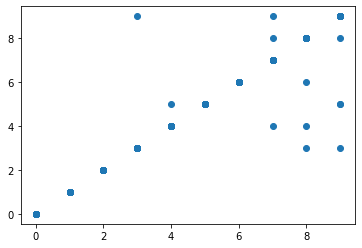

In [20]:
# Plot a scatterplot of predictions on X_test vs actual y_test values
predictions = grid.predict(X_test)
plt.scatter(predictions, y_test)

In [13]:
from sklearn.metrics import confusion_matrix, classification_report
matrix = confusion_matrix(y_test, predictions)
print(matrix)

[[37  0  0  0  0  0  0  0  0  0]
 [ 0 43  0  0  0  0  0  0  0  0]
 [ 1  0 42  1  0  0  0  0  0  0]
 [ 0  0  0 44  0  0  0  0  1  0]
 [ 0  0  0  0 37  0  0  1  0  0]
 [ 0  0  0  0  0 47  0  0  0  1]
 [ 0  0  0  0  0  0 52  0  0  0]
 [ 0  0  0  0  0  0  0 48  0  0]
 [ 0  1  0  0  0  0  0  1 46  0]
 [ 0  0  0  0  0  1  0  0  0 46]]


In [15]:
report = classification_report(y_test, predictions)
print(report)

              precision    recall  f1-score   support

           0       0.97      1.00      0.99        37
           1       0.98      1.00      0.99        43
           2       1.00      0.95      0.98        44
           3       0.98      0.98      0.98        45
           4       1.00      0.97      0.99        38
           5       0.98      0.98      0.98        48
           6       1.00      1.00      1.00        52
           7       0.96      1.00      0.98        48
           8       0.98      0.96      0.97        48
           9       0.98      0.98      0.98        47

    accuracy                           0.98       450
   macro avg       0.98      0.98      0.98       450
weighted avg       0.98      0.98      0.98       450

